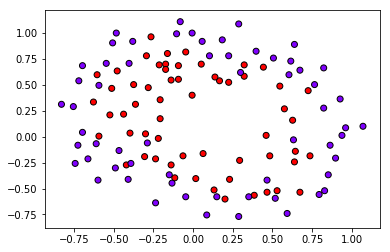

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

df = pd.read_csv('data/8_data.csv')
X = df[['test1','test2']]
y = df.output

plt.scatter(X.test1, X.test2, c = y, cmap=plt.cm.rainbow, edgecolors='k')

In [7]:
model = svm.SVC(kernel='rbf', gamma = 25)
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=25, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
X0, X1 = X.test1, X.test2
xx, yy = make_meshgrid(X0, X1)

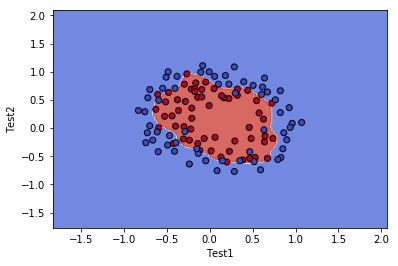

In [11]:
fig, sub = plt.subplots()
ax = sub
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_xlabel('Test1')
ax.set_ylabel('Test2')
plt.show()

In [10]:
model.score(X, y)

0.8728813559322034